In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [4]:
world = pd.read_csv("df_country_final.csv")
usa = pd.read_csv("us_final.csv")

In [ ]:
usa["Date"] = pd.to_datetime(usa["Date"])
world = pd.to_datetime(world["Date"])

In [189]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         14300 non-null  int64         
 1   Province_State     14300 non-null  object        
 2   Date               14300 non-null  datetime64[ns]
 3   Confirmed          14300 non-null  int64         
 4   Deaths             14300 non-null  int64         
 5   new_confirmed      14300 non-null  int64         
 6   new_deaths         14300 non-null  int64         
 7   new_confirmed_avg  13988 non-null  float64       
 8   new_deaths_avg     13988 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 1005.6+ KB


In [190]:
usa.describe(include="all")

,Unnamed: 0,Province_State,Date,Confirmed,Deaths,new_confirmed,new_deaths,new_confirmed_avg,new_deaths_avg
count,14300.00000,14300,14300,14300.000000,14300.000000,14300.000000,14300.000000,13988.000000,13988.000000
unique,NaN,52,275,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Wisconsin,2020-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,275,52,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2020-01-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-10-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,7149.50000,NaN,NaN,54227.801469,1929.518601,583.522308,15.536713,583.225173,15.707770
std,4128.19876,NaN,NaN,112346.978015,4481.182969,1229.202812,48.929933,1175.123533,46.149576
min,0.00000,NaN,NaN,0.000000,0.000000,-400.000000,-123.000000,-0.285714,-1.714286
25%,3574.75000,NaN,NaN,393.750000,7.000000,7.000000,0.000000,15.571429,0.142857


In [25]:
ny = usa[usa["Province_State"]=="New York"]

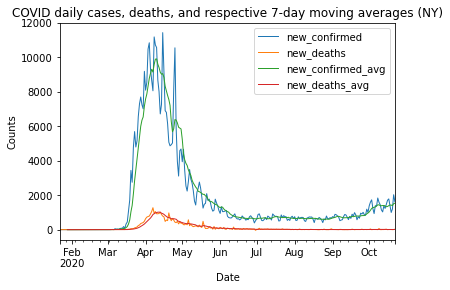

In [240]:
cols_toplot = ["new_confirmed", "new_deaths", "new_confirmed_avg", "new_deaths_avg"]
ny.plot(x="Date", y=cols_toplot, linewidth=1.0)
plt.title("COVID daily cases, deaths, and respective 7-day moving averages (NY)")
plt.ylabel("Counts")
plt.savefig("./over_time.png")
plt.show()

In [225]:
# experimental stuff; commenting out for now

# from fbprophet import Prophet

# df1 = ny.loc[(ny["Date"].dt.month >= 3) & (ny["Date"].dt.month <= 8), ["Date", "new_confirmed"]]
# df1 = df1.rename(columns={"Date":"ds",
#                           "new_confirmed":"y"})
# model1 = Prophet(yearly_seasonality=False)
# model1.fit(df1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [226]:
# forecast1 = model1.make_future_dataframe(periods=60, freq="D")
# forecast1 = model1.predict(forecast1)

Text(0.5, 1.0, 'prediction of daily cases')

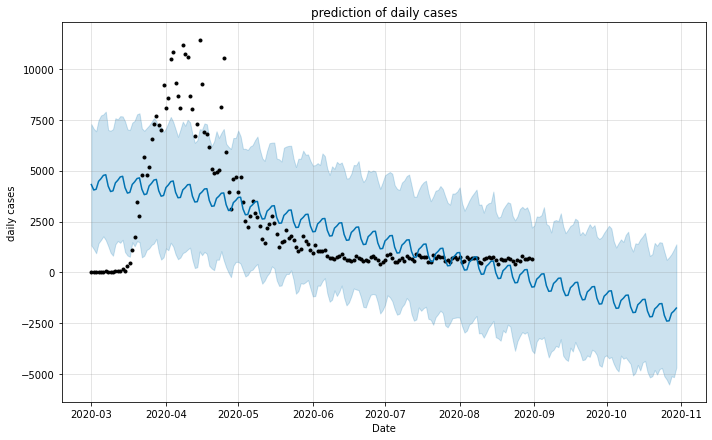

In [209]:
# model1.plot(forecast1, xlabel="Date", ylabel="daily cases")
# plt.title("prediction of daily cases")

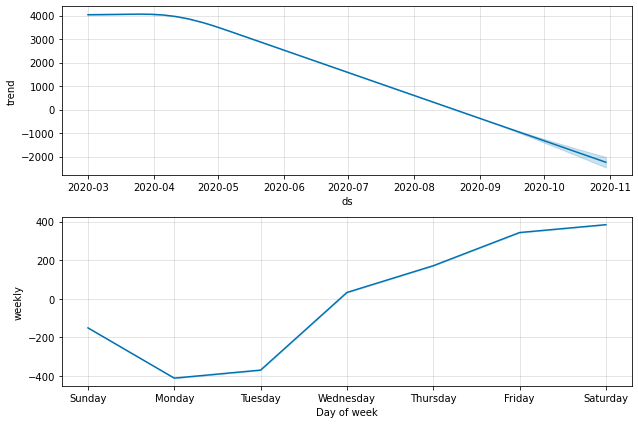

In [230]:
# model1.plot_components(forecast1);

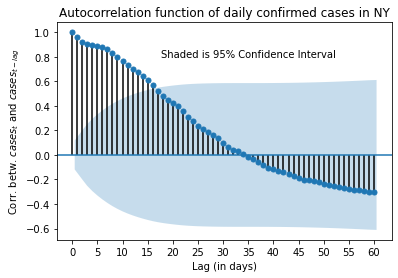

In [237]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

title = "Autocorrelation function of daily confirmed cases in NY"
plot_acf(ny["new_confirmed"], title=title, lags=60)
plt.xticks(range(0, 65, 5))
plt.xlabel("Lag (in days)")
plt.ylabel("Corr. betw. $cases_t$ and $cases_{t-lag}$")
plt.text(35, .8, "Shaded is 95% Confidence Interval", horizontalalignment='center')
# plt.savefig("./acf_ny.png")
plt.show()

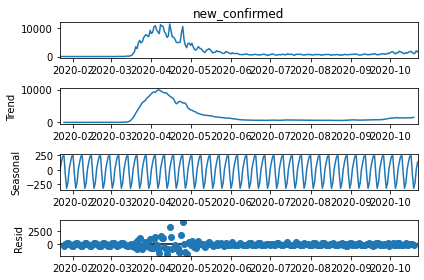

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ny["new_confirmed"])
decomp.plot();

Text(35, 0.8, 'Shaded is 95% Confidence Interval')

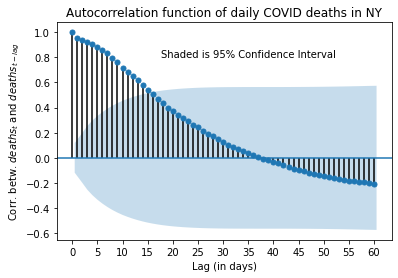

In [241]:
title = "Autocorrelation function of daily COVID deaths in NY"
plot_acf(ny["new_deaths"], title=title, lags=60)
plt.xticks(range(0, 65, 5))
plt.xlabel("Lag (in days)")
plt.ylabel("Corr. betw. $deaths_t$ and $deaths_{t-lag}$")
plt.text(35, .8, "Shaded is 95% Confidence Interval", horizontalalignment='center')